In [1]:
#import pandas_datareader.data as web
import datetime as dt
import arch.data.sp500
from arch import arch_model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = arch.data.sp500.load()

In [3]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1999-01-04,1229.229980,1248.810059,1219.099976,1228.099976,1228.099976,877000000
1999-01-05,1228.099976,1246.109985,1228.099976,1244.780029,1244.780029,775000000
1999-01-06,1244.780029,1272.500000,1244.780029,1272.339966,1272.339966,986900000
1999-01-07,1272.339966,1272.339966,1257.680054,1269.729980,1269.729980,863000000
1999-01-08,1269.729980,1278.239990,1261.819946,1275.089966,1275.089966,937800000
...,...,...,...,...,...,...
2018-12-24,2400.560059,2410.340088,2351.100098,2351.100098,2351.100098,2613930000
2018-12-26,2363.120117,2467.760010,2346.580078,2467.699951,2467.699951,4233990000
2018-12-27,2442.500000,2489.100098,2397.939941,2488.830078,2488.830078,4096610000


In [4]:
#returns = 100 * data['Close'].pct_change().dropna()

In [5]:
data_2 = data.copy()

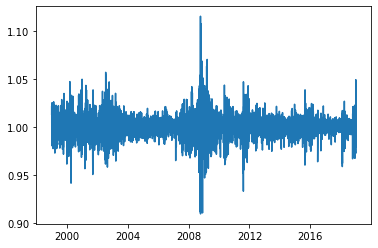

In [6]:
plt.plot(data_2['Adj Close']/data_2['Adj Close'].shift(1))

In [7]:
data_2['Adj Close']['2017-12-31':] = np.nan

<ipython-input-7-0c13c975fab6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2['Adj Close']['2017-12-31':] = np.nan


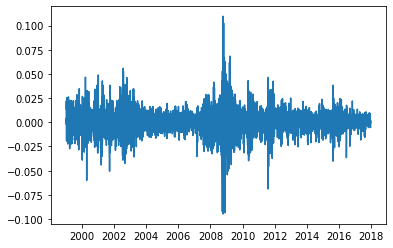

In [8]:
plt.plot(np.log(data_2['Adj Close']/data_2['Adj Close'].shift(1)))

In [9]:
#tem que tirar os NaN
am = arch_model(np.log(data_2['Adj Close']/data_2['Adj Close'].shift(1))['1999-01-05':'2017-12-31'] * 100)
res = am.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 2069839090.9228678
Iteration:      2,   Func. Count:     15,   Neg. LLF: 687043500.8354123
Iteration:      3,   Func. Count:     22,   Neg. LLF: 9674.549742060251
Iteration:      4,   Func. Count:     29,   Neg. LLF: 6667.894291999131
Iteration:      5,   Func. Count:     35,   Neg. LLF: 6664.313090055032
Iteration:      6,   Func. Count:     41,   Neg. LLF: 6603.552569205243
Iteration:      7,   Func. Count:     47,   Neg. LLF: 6745.645573038627
Iteration:      8,   Func. Count:     53,   Neg. LLF: 6597.134157417182
Iteration:      9,   Func. Count:     58,   Neg. LLF: 6597.063909985777
Iteration:     10,   Func. Count:     63,   Neg. LLF: 6597.053054238964
Iteration:     11,   Func. Count:     68,   Neg. LLF: 6597.052746492692
Iteration:     12,   Func. Count:     73,   Neg. LLF: 6597.0527376831305
Iteration:     13,   Func. Count:     77,   Neg. LLF: 6597.052737686481
Optimization terminated successfully    (Exit mode 0)
        

In [10]:
res.params

mu          0.049902
omega       0.014772
alpha[1]    0.092843
beta[1]     0.895875
Name: params, dtype: float64

In [11]:
forecasted_variance = res.model.forecast(res.params, horizon = 252, start='2017-12-29',  align='origin')._variance

In [12]:
forecasted_variance

,h.001,h.002,h.003,h.004,h.005,h.006,h.007,h.008,h.009,h.010,...,h.243,h.244,h.245,h.246,h.247,h.248,h.249,h.250,h.251,h.252
Date,,,,,,,,,,,,,,,,,,,,,
1999-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-01-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-12-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-12-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


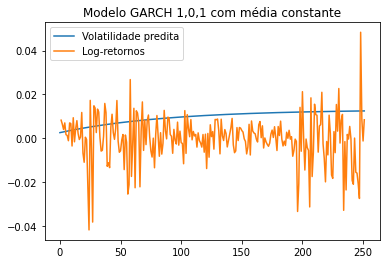

In [13]:
plt.plot(forecasted_variance.loc['2017-12-29'].values/100, label='Volatilidade predita')

#roda 
plt.plot(np.log(data["Adj Close"]['2017-12-29':]/data["Adj Close"]['2017-12-29':].shift(1)).values, label='Log-retornos')
plt.title('Modelo GARCH 1,0,1 com média constante')
plt.legend()

In [14]:
am_2 = arch_model(np.log(data_2['Adj Close']/data_2['Adj Close'].shift(1))['1999-01-05':'2017-12-31'] * 100, mean='HARX')
res_2 = am_2.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 2069839090.9228678
Iteration:      2,   Func. Count:     15,   Neg. LLF: 687043500.8354123
Iteration:      3,   Func. Count:     22,   Neg. LLF: 9674.549742060251
Iteration:      4,   Func. Count:     29,   Neg. LLF: 6667.894291999131
Iteration:      5,   Func. Count:     35,   Neg. LLF: 6664.313090055032
Iteration:      6,   Func. Count:     41,   Neg. LLF: 6603.552569205243
Iteration:      7,   Func. Count:     47,   Neg. LLF: 6745.645573038627
Iteration:      8,   Func. Count:     53,   Neg. LLF: 6597.134157417182
Iteration:      9,   Func. Count:     58,   Neg. LLF: 6597.063909985777
Iteration:     10,   Func. Count:     63,   Neg. LLF: 6597.053054238964
Iteration:     11,   Func. Count:     68,   Neg. LLF: 6597.052746492692
Iteration:     12,   Func. Count:     73,   Neg. LLF: 6597.0527376831305
Iteration:     13,   Func. Count:     77,   Neg. LLF: 6597.052737686481
Optimization terminated successfully    (Exit mode 0)
        

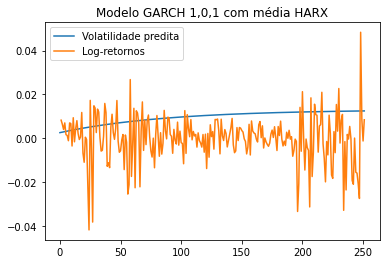

In [15]:
forecasted_variance_2 = res_2.model.forecast(res_2.params, horizon = 252, start='2017-12-29',  align='origin')._variance
plt.plot(forecasted_variance_2.loc['2017-12-29'].values/100, label='Volatilidade predita')


plt.plot(np.log(data["Adj Close"]['2017-12-29':]/data["Adj Close"]['2017-12-29':].shift(1)).values, label='Log-retornos')
plt.title('Modelo GARCH 1,0,1 com média HARX')
plt.legend()

#estranhamento, mudar a média não ajudou